In [39]:
# Import the necessary libraries 
import pandas as pd
import sqlite3

In [40]:
# Load the dataframe
tn_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_df



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [41]:
# Gives us a concise summary of our dataframe by giving us basic information concerning it
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [42]:
# Returns the summary statistics of our dataframe
tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [43]:
# Shows us the number of rows and columns in our dataframe
print('The dataframe contains:', tn_df.shape[0],'rows')
print('The dataframe contains:', tn_df.shape[1],'columns')


The dataframe contains: 5782 rows
The dataframe contains: 6 columns


In [44]:
#Checking for null values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [45]:
#Check for duplicates
tn_df.duplicated().sum()

0

In [46]:
# Dropping the release_date column
tn_df= tn_df.drop('release_date', axis=1)
tn_df

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0
5778,79,Following,"$6,000","$48,482","$240,495"
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,A Plague So Pleasant,"$1,400",$0,$0


In [47]:
# Checking the datatypes
tn_df.dtypes

id                    int64
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [48]:
# Removing the dollar signs and commas from the columns
tn_df['worldwide_gross']= tn_df['worldwide_gross'].replace('[\$,]', '', regex= True)
tn_df['production_budget']= tn_df['production_budget'].replace('[\$,]', '', regex= True)
tn_df['domestic_gross']= tn_df['domestic_gross'].replace('[\$,]', '', regex= True)

# Converting the columns into integers
tn_df['worldwide_gross']= tn_df['worldwide_gross'].astype('int64')
tn_df['production_budget']= tn_df['production_budget'].astype('int64')
tn_df['domestic_gross']= tn_df['domestic_gross'].astype('int64')

# Previewing the first five results
tn_df.head()


,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Dark Phoenix,350000000,42762350,149762350
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [49]:
# Checking to see if there are any 0 values in our worldwide_gross column
(tn_df['worldwide_gross'] == 0).sum()

367

In [50]:
# Retaining the rows where the values in the worldwide_gross is greater than zero
tn_df= tn_df[tn_df['worldwide_gross']>0]

# Checking that the zero values have been dropped
assert (tn_df['worldwide_gross']== 0).sum()==0

In [51]:
# Subtracting the production_budget from the worldwide_gross
tn_df['profit']= (tn_df['worldwide_gross']-tn_df['production_budget'])
# Previewing the first five
tn_df.head()
                        

<ipython-input-51-aec90ee3631b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_df['profit']= (tn_df['worldwide_gross']-tn_df['production_budget'])


,id,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,Avatar,425000000,760507625,2776345279,2351345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [52]:
import zipfile

# Extract the database file from the ZIP archive
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

# Connect to the extracted SQLite database
conn = sqlite3.connect('zippedData/im.db')

query = "SELECT name FROM sqlite_master WHERE type='table';"

tables = pd.read_sql_query(query, conn)

print("Tables in the database:")
print(tables)

Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [53]:
query = """
     SELECT *
     FROM persons
     JOIN directors
     USING (person_id)
     JOIN movie_basics
     USING (movie_id)
     JOIN movie_ratings
     USING (movie_id);
"""
imdb_df= pd.read_sql(query, conn)
imdb_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
4,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",6.4,256


In [54]:
imdb_df=imdb_df.drop(['birth_year', 'death_year', 'primary_profession', 'start_year', 'numvotes', 'primary_title', 'original_title'], axis=1)
imdb_df.head(20)

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
1,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
2,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
3,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4
5,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4
6,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4
7,nm0062879,Ruel S. Bayani,tt2590280,100.0,Drama,5.8
8,nm0062879,Ruel S. Bayani,tt8421806,115.0,None,7.9
9,nm0062879,Ruel S. Bayani,tt8421806,115.0,None,7.9


In [55]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   person_id        181387 non-null  object 
 1   primary_name     181387 non-null  object 
 2   movie_id         181387 non-null  object 
 3   runtime_minutes  163584 non-null  float64
 4   genres           180047 non-null  object 
 5   averagerating    181387 non-null  float64
dtypes: float64(2), object(4)
memory usage: 8.3+ MB


In [56]:
imdb_df.describe()

,runtime_minutes,averagerating
count,163584.000000,181387.000000
mean,97.789484,6.217683
std,194.434689,1.388026
min,3.000000,1.000000
25%,84.000000,5.400000
50%,94.000000,6.300000
75%,107.000000,7.200000
max,51420.000000,10.000000


In [57]:
imdb_df.shape

(181387, 6)

In [58]:
imdb_df.isnull().sum()

person_id              0
primary_name           0
movie_id               0
runtime_minutes    17803
genres              1340
averagerating          0
dtype: int64

In [59]:
imdb_df.dropna(subset=['runtime_minutes', 'genres'], inplace= True)


In [60]:
imdb_df['runtime_minutes']= imdb_df['runtime_minutes'].astype('int64')

In [61]:
imdb_df.dtypes

person_id           object
primary_name        object
movie_id            object
runtime_minutes      int64
genres              object
averagerating      float64
dtype: object

## Identify directors whose films receive the best ratings

In [62]:
# Take the director name and the ratings of their movies from the imdb dataframe
directors_df = imdb_df[['primary_name', 'averagerating']]
directors_df

,primary_name,averagerating
0,Ruel S. Bayani,6.4
1,Ruel S. Bayani,6.4
2,Ruel S. Bayani,6.4
3,Ruel S. Bayani,6.4
4,Ruel S. Bayani,6.4
...,...,...
181381,Benjamin Ovesen,7.4
181382,Frank W Chen,5.8
181383,Frank W Chen,5.8
181384,Prasobh Vijayan,5.7


In [63]:
# Group the directors by their name to calculate their average rating
directors_df = directors_df.groupby('primary_name').agg(
    Average_Rating=('averagerating', 'mean'),
    Movie_Count=('averagerating', 'count')
).reset_index()

directors_df

,primary_name,Average_Rating,Movie_Count
0,A Normale Jef,7.20,46
1,A'Ali de Sousa,4.20,1
2,A. Blaine Miller,7.00,1
3,A. Cengiz Mert,3.20,1
4,A. Fishman,7.80,1
...,...,...,...
51618,Ümit Kivanç,7.90,2
51619,Ümit Köreken,6.40,3
51620,Ümit Uludag,9.20,1
51621,Ümit Ünal,5.95,4


In [64]:
# Sort the directors by the average rating of their movies
top_rated = directors_df.sort_values(by='Average_Rating', ascending=False).head(20)
top_rated

,primary_name,Average_Rating,Movie_Count
31509,Masahiro Hayakawa,10.0,1
28788,Loreto Di Cesare,10.0,2
14093,Emre Oran,10.0,1
28524,Lindsay Thompson,10.0,1
33519,Michiel Brongers,10.0,1
19699,Ivana Diniz,10.0,2
34776,Nagaraja Uppunda,9.9,1
2409,Amoghavarsha,9.9,1
39635,Raphael Sbarge,9.9,1
25632,Kalyan Varma,9.9,1


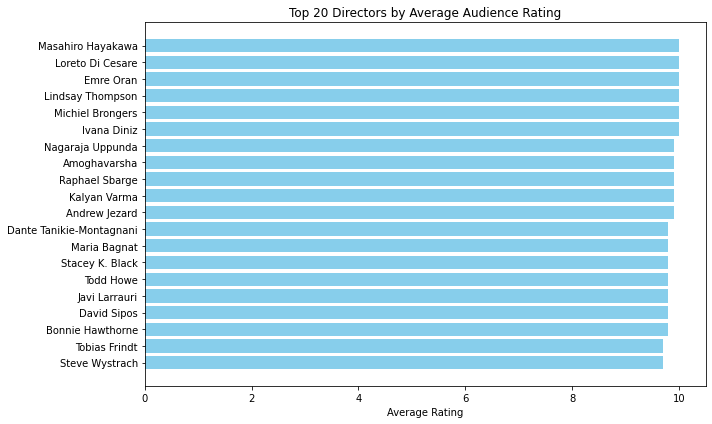

In [65]:
# visualize the top rated directors
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_rated['primary_name'], top_rated['Average_Rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 20 Directors by Average Audience Rating')
plt.gca().invert_yaxis()  # Highest rating at the top
plt.tight_layout()
plt.show()

The highest rated directors seem to have worked on very few movies. We need to find the ones with some experience in the industry

In [66]:
# Sort the directors by the number of movies directed to gauge their experience level
experienced_df = directors_df.sort_values(by='Movie_Count', ascending=False).head(10)
experienced_df

,primary_name,Average_Rating,Movie_Count
43999,Shane Ryan,5.626452,155
48323,Tony Newton,4.785385,130
41692,Ruben Rodriguez,6.079845,129
9600,Corey Norman,6.017757,107
21049,Jason Impey,5.158824,102
14792,Evan Marlowe,6.403000,100
20357,James Cullen Bressack,4.601020,98
37318,Patrick Rea,6.153933,89
19761,Izzy Lee,5.518293,82
16413,Gav Chuckie Steel,6.558025,81


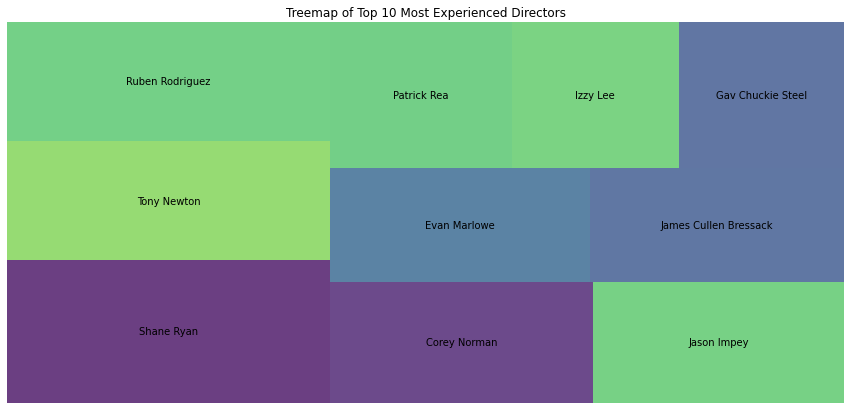

In [67]:
# visualize the most experienced directors
import squarify

plt.figure(figsize=(15, 7))
squarify.plot(sizes= experienced_df['Movie_Count'], label=experienced_df['primary_name'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Top 10 Most Experienced Directors')
plt.show()


To find the best directors to recommend, we need to take into account both experience level and ratings. So we have to sort by movie count (experience) then pick the best rated among these

In [68]:
# sort directors by movie count then pick the best rated among these experienced directors
best_directors_df = directors_df.sort_values(by='Movie_Count', ascending=False).head(10)
best_directors_df

,primary_name,Average_Rating,Movie_Count
43999,Shane Ryan,5.626452,155
48323,Tony Newton,4.785385,130
41692,Ruben Rodriguez,6.079845,129
9600,Corey Norman,6.017757,107
21049,Jason Impey,5.158824,102
14792,Evan Marlowe,6.403000,100
20357,James Cullen Bressack,4.601020,98
37318,Patrick Rea,6.153933,89
19761,Izzy Lee,5.518293,82
16413,Gav Chuckie Steel,6.558025,81


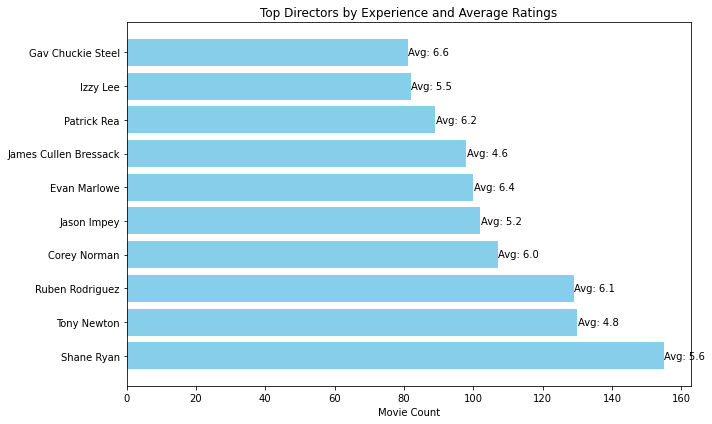

In [69]:
# visualize the data

plt.figure(figsize=(10, 6))
bars = plt.barh(best_directors_df['primary_name'],best_directors_df['Movie_Count'], color='skyblue')

# Annotate each bar with average rating
for bar, rating in zip(bars, best_directors_df['Average_Rating']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'Avg: {rating:.1f}', va='center')

plt.xlabel('Movie Count')
plt.title('Top Directors by Experience and Average Ratings')
plt.tight_layout()
plt.show()


Now we'll plot two axes to show both ratings and number of movies for each director on the same figure

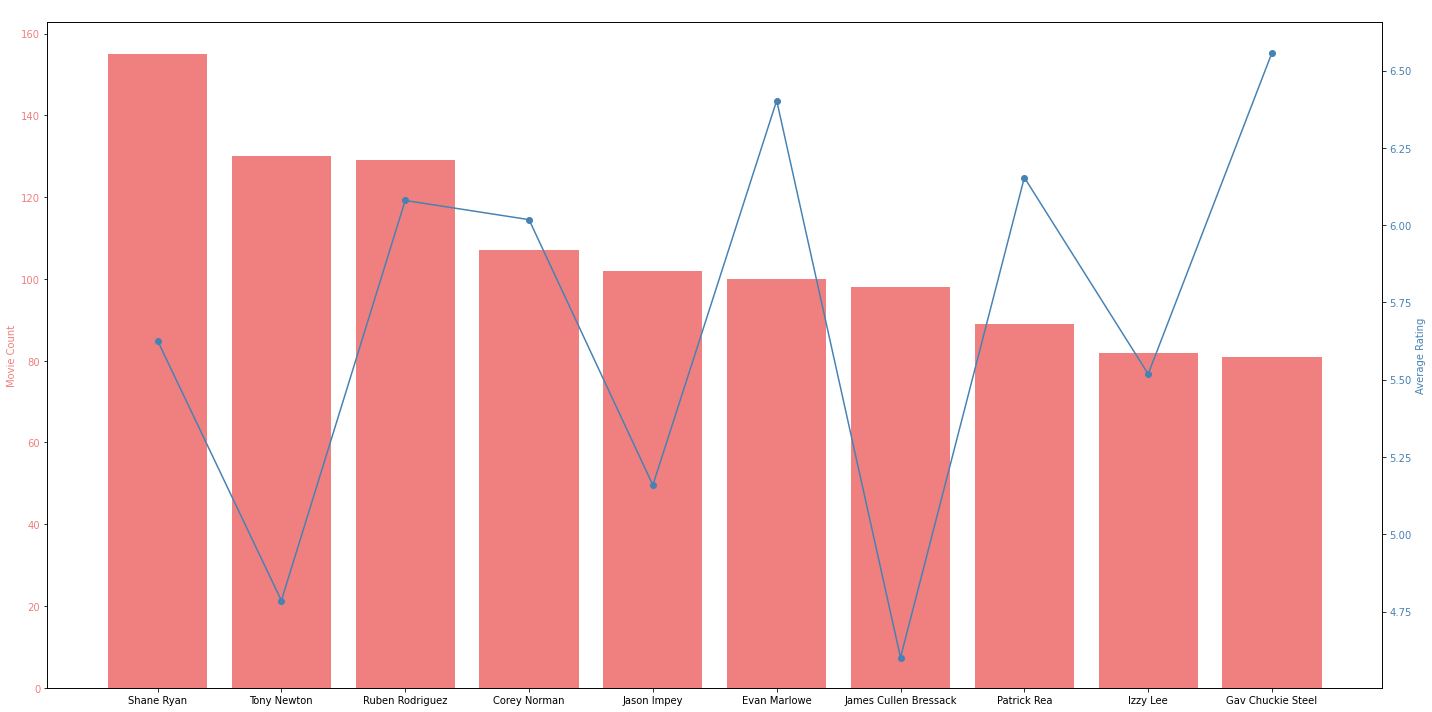

In [70]:
# plot a dual axis bar and line graphs
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for movie count
ax1.bar(best_directors_df['primary_name'], best_directors_df['Movie_Count'], color='lightcoral')
ax1.set_ylabel('Movie Count', color='lightcoral')
ax1.tick_params(axis='y', labelcolor='lightcoral')

# Line plot for average rating
ax2 = ax1.twinx()
ax2.plot(best_directors_df['primary_name'], best_directors_df['Average_Rating'], color='steelblue', marker='o')
ax2.set_ylabel('Average Rating', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

plt.title('Best Directors: Movie Count (experience) and Average Rating', color = 'white')
plt.tight_layout()
plt.show()


From the visualization above, the best directors out of these according to their ratings and experience are: 
1. Sergey A.
2. Evan Marlowe
3. Patrick Rea
4. Ruben Rodriguez
5. Corey Norman